# <font color='purple'>IRIS dataset </font>
***

### Summary of IRIS dataset:
***

The IRIS dataset, created in 1936, is a popular dataset commonly used for exploring data analysis and data visualisation.

The dataset consists of measurements for 3 different species (setosa, versicolor and virginica) of Iris flowers.  
There are 50 entries per species detailed in the dataset.

#### Species:
|Setosa    |Versicolor | Virginica|
|-----------|---------------|------------|
|![Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)|![Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/320px-Iris_versicolor_3.jpg)|![Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg)|

As the species variable are plain text, the data type string will be applicable here.

Four characteristics of the flowers were tracked including sepal length, sepal width, petal length and petal width.  
These four varaibles are numeric values and looking at the raw data we can see decimal places are present. 
With this, the data type used for this variables will be float.

 

### How to run analysis.py program:
***

### Cloning repo in GitHub:


1. Copy the following URL:  
        https://github.com/Ange-Dvs/pands-project.git

1. Open CMDER or if using VS Code open the terminal pane

1. Go to the folder where you want to clone the repository to on your machine and type git pull.  
        

1. Set merge as the mode for the pull  
        

1. Initiate the pull of the GitHub repository  
        

1. If the pull has been successful you should see 4 files pulled from GitHub
        The .gitignore file, a csv file containing the dataset, the readme in the form of a Jupyter notebook and the analysis.py file which contains the program to run.  
        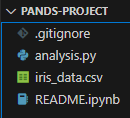

### Running the code on your machine

1. To run the code open CMDER or the terminal in VS Code.
1. Navigate to the folder where the repository is stored.
1. Type  and hit enter. 
1. The python code should run and generate 8 files.
    - modified_iris_data.csv created
    - hist_sepal_length.png created.
    - hist_sepal_width.png created.
    - hist_petal_length.png created.
    - hist_petal_width.png created. 
    - scatter_all_variables.png created. 
    - hist_all_variables_per_species.png created. 
1. If the code has run successfully you will see confirmation printed when each file is created.  
        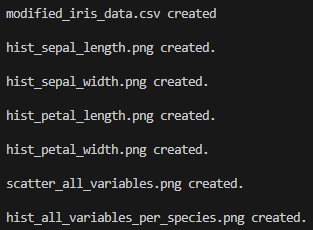
    

##### Error handling 

Error handling is including in the code to ensure if a file is already existing in the folder with the same filename the user will be informed.

The error messages will look like this:  
    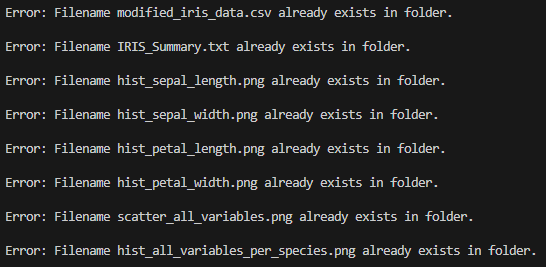

If the error message for a file is returned that file will not be re-created or overwritten.
If you want to rerun the code and create the files again, you'll need to delete the existing file or files first.

### Runthrough of code

The next section of the notebook is a walkthrough of the contents of the analysis.py file.  
While the functionality will be explained in this notebook, a line by line explaination of the code is contained within the analysis.py file itself.

The code contains the creation of:
- A modified CSV file with shortened names for variables
- A summary text file including some calculations using the data within the dataset
- Multiple png files containing histograms of the variables showing the distribution of the dataset overall and colourcoded per species and a larger figure containing a subplot showing the variables per species seperately
- A png file show a scatter plot of each pair of variables

To have a concised view of code for the generation of the different files the order you will see the code here differs slightly to that in analysis.py. 

##### Importing the libaries used in the program

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate as tb

##### Reading and clean up of the data

In [ ]:
original_df = pd.read_csv('iris_data.csv')      # fetching data from csv file

# Tidying up the dataset so that it is the items printed to the summary file are more readable, i.e. the output of df.describe() would be split due to the length of the column headers by checking for the original df for " (cm)" and deleting it
original_df.columns = original_df.columns.str.replace(' (cm)', '')

# Check if the file already exists
if os.path.exists('modified_iris_data.csv'):
        print('\nError: Filename modified_iris_data.csv already exists in folder.')
else:
        # Saving modified dataset back to a new CSV file so that we can use the tidied information for the plots
        original_df.to_csv('modified_iris_data.csv', index=False)
        print('\nmodified_iris_data.csv created\n')

df = pd.read_csv('modified_iris_data.csv') # fetching data from the new tidied csv file

##### Error handling for PNG files

One function reused throughout the code is the check_png_file_exists() function.  
This enables a error message to be returned to the user if the a filename for one of the generated plots is already existing

In [ ]:
def check_png_file_exists(PNG_filenames): # creating a function which will check if the PNG files are already existing before trying to create them
    if os.path.exists(PNG_filenames): # using OS library the value set in "PNG_filenames" (defined outside of the function) is used to check if the file is already existing 
        raise FileExistsError # if the file exists the FileExists Error is thrown and it triggers the except path outside the function

The above function reads in the value passed for the PNG_filename variable allowing the functionality to be reused throughout the program for the creation of the multiple PNG files.  

The OS libary is used to check if the path exists for the file and raises a FileExistsError in case the filename is present in the folder, which in turn triggers the except path of the code outside of the function.  

### Creating summary file
***

First we'll take a look at the function created for the creation of the summary file write_summary_file().

In [12]:
def write_summary_file(xy_value, dfs_to_use):
        text_file_name = 'IRIS_Summary.txt'
        try:
                with open(text_file_name, 'x', encoding='utf-8') as f: 
                        num_values = df.describe() 
                        setosa_info = df[df['class'] == 'Iris-setosa'].describe()
                        versicolor_info = df[df['class'] == 'Iris-versicolor'].describe()
                        virginica_info = df[df['class'] == 'Iris-virginica'].describe()
                        length_df = len(df)
                        data_types = df.dtypes
                        count_class = df['class'].value_counts()                        
                        intro = (f'\t\t\t\t\t\t**** The IRIS dataset ****\n\nCreated in 1936, the Iris dataset is a popular dataset commonly used for exploring data analysis and data visualisation.\n\nThe dataset consists of measurements for 3 different classes (Setosa, Versicolor and Virginica) of Iris flowers. The number of rows in the dataset is {length_df}, meaning the we have the information for 150 Iris flowers tracked. To see how many entries are tracked per class of Iris we can use the value_count method.\n\n\t{count_class}.\n\nFrom the above we can see there are 50 entries per class detailed in the dataset, so each class accounts for a third of the entries in the dataset. As the classes variable are plain text, the data type string will be applicable here.\n\nFour characteristics of the flowers were tracked including sepal length, sepal width, petal length and petal width. These four variables are numeric values and looking at the raw data we can see decimal places are present. With this, the data type used for this variables will be float. We can check this easily using pandas in python.\n\nVariable:\t\tData type:\n{data_types}\n\nFrom the above we can see that the data type for the numerical variables is in fact a float. For the class variable we can see object is stated. Within pandas the object data type is the most general data type and can hold any Python objects including strings.\n\nNext we will generate some statistical information which will be analysed in the README.ipynb in further details.\n\nNumerical summary looking only of all classes together:\n{num_values}\n\nNumerical summary looking only at the Setosa class:\n{setosa_info}\n\nNumerical summary looking only at the Versicolor class:\n{versicolor_info}\n\nNumerical summary looking only at the Virginica class:\n{virginica_info}\n')

                        f.write(intro)
                        correlations = {} 
                        for (classes) in (dfs_to_use):
                                for i, (x_value, y_value) in enumerate(xy_value, start=1):
                                        if i in [2, 3, 4, 7, 8, 12]:
                                                corr_calculated = float(dfs_to_use[classes][x_value].corr(dfs_to_use[classes][y_value]))
                                                name = (f'{classes} {x_value} vs {y_value}')
                                                correlations[name] = corr_calculated
                        corr_table = [
                        ['Correlation\ncoefficient','Sepal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Length','Petal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Width','Petal Width\nvs.    \nSepal Width','Petal Width\nvs.    \nPetal Length'],
                        ['All classes', correlations['All classes - sepal width vs sepal length'], correlations['All classes - petal length vs sepal length'], correlations['All classes - petal width vs sepal length'], correlations['All classes - petal length vs sepal width'], correlations['All classes - petal width vs sepal width'], correlations['All classes - petal width vs petal length']],
                        ['Setosa', correlations['Setosa - sepal width vs sepal length'], correlations['Setosa - petal length vs sepal length'], correlations['Setosa - petal width vs sepal length'], correlations['Setosa - petal length vs sepal width'], correlations['Setosa - petal width vs sepal width'], correlations['Setosa - petal width vs petal length']],
                        ['Versicolor', correlations['Versicolor - sepal width vs sepal length'], correlations['Versicolor - petal length vs sepal length'], correlations['Versicolor - petal width vs sepal length'], correlations['Versicolor - petal length vs sepal width'], correlations['Versicolor - petal width vs sepal width'], correlations['Versicolor - petal width vs petal length']],
                        ['Virginica', correlations['Virginica - sepal width vs sepal length'], correlations['Virginica - petal length vs sepal length'], correlations['Virginica - petal width vs sepal length'], correlations['Virginica - petal length vs sepal width'], correlations['Virginica - petal width vs sepal width'], correlations['Virginica - petal width vs petal length']]                       
                        ]

                        table_to_print = tb(corr_table, headers='firstrow', tablefmt='fancy_grid')  
                        
                        f.write(f'\nCorrelation per pair of variables:\n')
                        f.write(table_to_print)

        except FileExistsError:
                print (f'\nError: Filename {text_file_name} already exists in folder.\n')

##### Definition of variables and main text created for the text file

In the above, the FILENAME is first defined to be used for the error handling in case the file is already existing when the program attempts to create it.  

Then the function attempts to follow the try path, here the file is created. Setting 'x' as the mode ensures that a FileExistsError is thrown is the file exists and will not ammend or overwrite the file if it is already in the folder. If this happens the program will jump to the except path and print a message for the user informing the file already exists.  

Within the step of creating the file the encoding is also set, UTF-8 is used to allow for symbols used in the table generated for the summary file to be saved to the text file.  

The following lines include the definition of numerous variables to use in the intro file. This intro which includes the main bulk of text and a mathematical summary of the variables is then written to the text file. Next the program moves to code calculating the correlation coefficient and displaying it for the user in an easy to read view as a table.  

##### Calculation of the correlation coefficient

An empty dictionary is created to later store the calculated correlation of the pairs of variables. A dictionary called "dfs_to_use" and a list called "xy_values" are passed from outside the function for use in the calculation. These are used to create a loop to allow the correlation for the relevant pairs of variables to be generated dynamically using values passed from the list and dictionary, removing the need for repeated lines of code with the variables hardcoded.  

The parent for loop passes over the different classes contained in the dfs_to_use, this allows the calculation of the correlation overall using the dates in the entire dataset for all classes and then calculate it for the individual classes. Within the classes for loop another for loop is used to iterate through the xy_value list. enumerate is then used to take the values from the tuples contained in the list and parse them to the variables x_value and y_value, it also starts the value the counter of the loop (i) to 1. 

Next an if statement is set so that the calculation is only carried out for certain iterations of the loop. This is to avoid carrying out the same calculations more than neccessary as the list is used also for the generation of the scatter chart and contains blank "empty" tuples and the same variables twice with the order swapped (i.e. ('sepal width', 'sepal length') and ('sepal length', 'sepal width')).  

When the if statement condition is met, it is executed and the correlation is calculated using the class defined in the parent "for" loop and the x and y value defined in the second for loop. The name is then created using these values to allow for us to index into the dictionary when creating the table. The name and calculated correlation are then saved as a keypair to the correlations dictionary.

##### Creation of the table to show the calculated correlation coefficient

After all calculations are completed a list is created called "table" which contains 5 sub-lists, you can think of each list as representing a row in a table.   

The first row will be used to set the headers for the table using the string values it contains. The second list contains the values for the calculated coefficient for the entire dataset. The third list calls the data for relevant correlation values for the Setosa only, followed by the Versicolour list fourth and lastly the values for the Virginica class in the fifth list. The name of the keypair is used to index into the "correlations" dictionary and retrive the value for the corresponding correlation.  

The tabulate libary is then used to take the "table" list and format it as a table, it is set to consider the first row to be headers and the fancy grid option for the formatting is used to make it more pleasant to read the table. The table is then written to the summary file and the code for writing the summary file within the function is finished.

##### Looking at the lines within the main program of the code

In [ ]:
xy_value = [('',''), ('sepal width', 'sepal length'), ('petal length', 'sepal length'), ('petal width', 'sepal length'), ('sepal length', 'sepal width'), ('',''), ('petal length', 'sepal width'), ('petal width', 'sepal width'), ('sepal length','petal length'), ('sepal width', 'petal length'), ('',''), ('petal width', 'petal length'), ('sepal length', 'petal width'), ('sepal width', 'petal width'), ('petal length','petal width'), ('','')]

dfs_to_use = {'All classes -': df,'Setosa -': df[df['class'] == 'Iris-setosa'], 'Versicolor -': df[df['class'] == 'Iris-versicolor'], 'Virginica -': df[df['class'] == 'Iris-virginica']}

write_summary_file(xy_value, dfs_to_use)

To make the program easily readable for the user the main code block outside of the function is minimum, for the creation of the summary file the relavant components in the main code block can be seen above. 
1. The xy_value list - used to set the variables which should be used for calculating the correlation coefficient
1. The dfs_to_use dictionary - used for selecting which data to use in the correlation calculations using first the data for the entire dataset and then seperating the entries depending on class.
1. Line triggering the write summary file - this calls the function to be initiated and passes the list and dictionary to the function to be used within the function itself. 

In [ ]:
# Show the different types of values in the data set
df.dtypes

In [ ]:
# Highlevel summary of dataset for the numerical columns 
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
count_class = df['class'].value_counts() # getting the count of the male and female entries in the dataset
print(count_class) # printing the counts

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### Creating Histograms
***

The creation png files showing the dirtibution of each variable via a histograms is the next functionality we'll go through.

In [ ]:
def create_histograms(variables_and_filenames):
        for variable_to_plot, PNG_filenames in variables_and_filenames.items():
                try:
                        check_png_file_exists(PNG_filenames)
                        plt.figure(figsize=(10,5)) 
                        plt.subplot(1, 2, 1) 
                        plt.hist(df[variable_to_plot])
                        plt.title('All classes of Iris together') 
                        plt.subplot(1, 2, 2) 
                        all_sepal_lengths = [df[df['class'] == 'Iris-setosa'][variable_to_plot], df[df['class'] == 'Iris-versicolor'][variable_to_plot], df[df['class'] == 'Iris-virginica'][variable_to_plot]]
                        plt.hist(all_sepal_lengths, 
                                stacked=True,  
                                label=['Setosa', 'Versicolor', 'Virginica'], 
                                edgecolor='white',
                                color=['violet', 'navy', 'orange']) 
                        plt.title('Colour coded per class of Iris') 
                        plt.yticks([])
                        plt.tight_layout()  
                        plt.legend() 
                        plt.suptitle(f'Distribution of {variable_to_plot}', fontsize = 18, y= 1.05)
                        plt.figtext(0.5, -0.01, f'{variable_to_plot} (cm)', ha='center', fontsize=14, fontstyle='italic')
                        plt.savefig(PNG_filenames, bbox_inches='tight') 
                        print(f'{PNG_filenames} created.\n') 

                except FileExistsError: 
                        print(f'Error: Filename {PNG_filenames} already exists in folder. \n')

The function uses the keypair values from the variable_and_filenames dictionary.  

A for loop is used to iterate over the keypairs in the dictionary reducing unnessary repetition of lines of code. The try path is first attempted, if the check_png_file_exists() function (explained earlier in the notebook) returns a FileExistsError the except path will be triggered. The size of the figure for the png file is set to allow for the image to be large enough to comfortably fit the data in the image in an easily readable way.

Next the creation of two plots is triggered, first a plot showing the data for the variable in a given loop within the entire dataset, this is then plotted to the subplot in the first position. 

Next the histogram is created again for the subplot in the second position however this time the data is seperated and colour coded per class of Iris to visualise the spread of distribution depending on the class for the variable. This is done using the "stacked" attribute to allow the data to be stacked on top of each other instead of treated as seperate columns. 

##### Customizing the histograms

Along with the figure size being set, there are various settings defined for customizing the appearance of the histogram.
The colour to be used for plotting the data per class is defined, the yticks are removed from the second subplot to avoid overcrowding of the figure as subplot 2 using the same range as the first subplot.  An overall title detailing the variable which is being plotted is added and the font side and position set. A shared label for the x axis is created using figtext since the plots share the same variable, the style, size and position of the text is defined. 

Lastly the file is saved using the filename passed in from the dictionary and ensuring no data like the title is cut off using the bbox_inches attribute. A message is then printed to the user to inform them that the file has been created and providing the filename.

##### Looking at the lines within the main block of code

In [ ]:
variables_and_filenames = {
    'sepal length': 'hist_sepal_length.png',
    'sepal width': 'hist_sepal_width.png',
    'petal length': 'hist_petal_length.png',
    'petal width': 'hist_petal_width.png'}

create_histograms(variables_and_filenames) 

To make the program easily readable for the user the main code block outside of the function is minimum, for the creation of the histogram file the relavant components in the main code block can be seen above. 
1. The variables_and_filenames dictionary - used for passing the variable to plot in a loop to the function and the related filename to use when saving the figures.
1. Line triggering the create_histograms() function - this calls the function to be initiated and passes the dictionary to the function to be used within the function itself. 

Creating the scatter plot
***

In [ ]:
def create_scatter_all_variables(xy_value, dfs_to_use):
        PNG_filenames = 'scatter_all_variables.png'
        plt.figure(figsize=(9, 9)) 
        try: 
                check_png_file_exists(PNG_filenames)
                for i, (x_value, y_value) in enumerate(xy_value, start=1):
                        if i in (1, 6, 11, 16): 
                                plt.subplot(4,4,i) 
                                plt.yticks([])
                                plt.xticks([])
                                plt.plot()
                                if i == 1:
                                        plt.figtext(.14, .82, 'Sepal\nLength', ha='center', fontsize=22, fontstyle='italic')
                                elif i == 6:
                                        plt.figtext(.385, .585, 'Sepal\nWidth', ha='center', fontsize=22, fontstyle='italic')
                                elif i == 11:
                                        plt.figtext(.625, .355, 'Petal\nLength', ha='center', fontsize=22, fontstyle='italic')
                                elif i == 16:
                                        plt.figtext(.86, .12, 'Petal\nWidth', ha='center', fontsize=22, fontstyle='italic')
                                        plt.tight_layout()
                                        plt.suptitle('All variables', y=1.08, fontsize=32) 
                                        plt.figlegend(loc = 'upper center', ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14, labels=['Setosa', 'Versicolor', 'Virginica'])
                                        plt.savefig(PNG_filenames, bbox_inches='tight') 
                                        print(f'{PNG_filenames} created.\n') 
                        else:
                                plt.subplot(4,4,i) 
                                for class_name, class_df in dfs_to_use.items(): 
                                        if class_name == 'Setosa -':
                                                marker_colour = 'violet'
                                        elif class_name == 'Versicolor -':
                                                marker_colour = 'navy'
                                        elif class_name == 'Virginica -':
                                                marker_colour = 'orange'
                                        else: 
                                                marker_colour = 'black'
                                        
                                        if class_name != 'All classes -': 
                                                plt.scatter(class_df[x_value], class_df[y_value], color= marker_colour) 
                                        if i in (3, 7, 8, 9, 10, 1):
                                                plt.yticks([])
                                                plt.xticks([])
                                        elif i == 2: 
                                                plt.yticks([])
                                                plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
                                        elif i == 4: 
                                                plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)
                                                plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
                                        elif i == 5: 
                                                plt.xticks([])
                                        elif i == 12: 
                                                plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)
                                                plt.xticks([])
                                        elif i == 15:
                                                plt.yticks([])
        
        except FileExistsError: 
                print(f'Error: Filename {PNG_filenames} already exists in folder.\n')

The function uses the tuples from the xy_value list to generate a figure containing 16 subplots.

The try path is first attempted, using check_png_file_exists() function (explained earlier in the notebook) again, if it returns a FileExistsError the except path will be triggered. The filename and size of the figure for the png file is set to allow for the image to be large enough to comfortably fit the data in the image in an easily readable way to avoid potential overlap and ensure the plots are readible and not too small considering a large number of subplots are required to fit in the final figure.  

##### Looping over the values to be used for x and y
A for loop is also used in this fucntion to iterate over the tuples in the list to reduce excess lines of code, setting the corresponding information in the tuple as the x and y value to be used in the plots, a counter is created as i with a starting value of 1 to allow the counter to be used to dynamically set the position of the subplot for each iteration later. 

##### Creating empty plots & condition for saving the figure
An if statemment checks if the iteration is matching one of the numbers in the condition, if it does the corresponding plots will not contain a scatter plot but instead an empty plot is generated. The figtext method is used to position the name of a variable within the boundries of the empty plot, this is to reflect which variable is being used for the x axis in a column and the y axis in the row where that plot is located.  

It also contains the logic to identify if the loop is in the last iteration to ensure the file is saved and the relavant steps which are only required to be completed once at the end are triggered. This includes the creation and positioning of the legend, the creation of the title for the figure and ensuring the layout is not overlapping. A message is also printed for the user at this stage in the loop to confirm the creation of the scatter plot .png file. 

##### Creating subplots containing the scatter plot of each pair of variables
The main else block contains the path all other iterations should take which involves actually creating scatterplots using the values contained in the tuples in the xy_value list. This block also includes a check for which class is being plotted and setting the corresponding colour depending on the class. 

An if statement is also used to ensure that the data for the dataset as a whole is not plotted as the goal is to show the scatter plot with colours indicating which class is linked to each marker on the plot. If any of the individual classes are used for the iteration is it trigger the line of code responsible the creation of the scatter plot, the line is dynamic using the value for the class_df from the dfs_to_use diction and the x and y values are select using the tuples in the xy_value list for each iteration. 

##### Customization of x and y ticks for specific subplots
As the requirements for customization of the plots varies depending on which postion the subplot is located, a series of if elif statements are used to enhance the settings for the subplots depending on the iteration/subplot using the value of i. The majority of the subplots require the removal of the x and y ticks, this is handled by the first if statment. 

The next 5 elif statements contain the ablity to remove the x or y ticks or move the x or y ticks depending on what is required for the plot. For example for the subplot in position 4, the x and y ticks are set to be placed on the opposite side of the plot. Instead of the x labels and ticks being on the bottom of the plot as per the default, they are set to be moved to the top of the plot. Similarly for the y axis the y labels and ticks are set to be placed on the right of the plot instead of the left. This is done to reflect that the same range is used for all of the values in that column and y values in the row, in the end aiming to reduce clutter in the image and make the plot easier to read for the user. 

##### Looking at the main block of code

In [ ]:
xy_value = [('',''), ('sepal width', 'sepal length'), ('petal length', 'sepal length'), ('petal width', 'sepal length'), ('sepal length', 'sepal width'), ('',''), ('petal length', 'sepal width'), ('petal width', 'sepal width'), ('sepal length','petal length'), ('sepal width', 'petal length'), ('',''), ('petal width', 'petal length'), ('sepal length', 'petal width'), ('sepal width', 'petal width'), ('petal length','petal width'), ('','')]

dfs_to_use = {'All classes -': df,'Setosa -': df[df['class'] == 'Iris-setosa'], 'Versicolor -': df[df['class'] == 'Iris-versicolor'], 'Virginica -': df[df['class'] == 'Iris-virginica']}
create_scatter_all_variables(xy_value, dfs_to_use)

To make the program easily readable for the user the main code block outside of the function is minimum, for the creation of the scatter plot file the relavant components in the main code block can be seen above. 
1. The xy_value list - used to set the variables for the x and y axis of each subplot depending on the iteration of the parent for loop within the function
1. The dfs_to_use dictionary - used for selecting which data to use in creation of the scatter plots, these values are also used for selecting the colour to be used in the loop for each class.
1. Line triggering the create_scatter_all_variables() - this calls the function to be initiated and passes the list and dictionary to the function to be used within the function itself.

### Creating figure containing histograms of each variable isolated per species

In [ ]:
def setting_axis_limits(s): 
    ymin = 0 
    if s in (1, 2, 3):
        ymax = 19.5
    elif s in (4, 5, 6):
        ymax = 16.5
    elif s in (7, 8, 9):
        ymax = 38
    elif s in (10, 11, 12):
        ymax = 42
    plt.ylim(ymin, ymax)

def set_bins_width(variable_to_plot, dfs_to_use):
        min_width = min(df[variable_to_plot].min() for df in dfs_to_use.values()) 
        max_width = max(df[variable_to_plot].max() for df in dfs_to_use.values()) 
        bin_edges = np.linspace(min_width, max_width, 11) 
        return bin_edges 

def create_histogram_per_classes(variables_and_filenames, dfs_to_use):
        PNG_filenames = 'hist_all_variables_per_species.png' 
        try: 
                check_png_file_exists(PNG_filenames) 
                plt.figure(figsize=(9, 14)) 
                for variable_to_plot in variables_and_filenames: 
                        bin_edges = set_bins_width(variable_to_plot, dfs_to_use) 
                        for i, (class_name, class_df) in enumerate(dfs_to_use.items(), start=1): 
                                if i != 1: 
                                        plt.subplot(4, 3, s) 
                                        if s in (1, 4, 7, 10): 
                                                colour_to_use = 'violet'
                                                plt.yticks([])
                                        elif s in (2, 5, 8, 11): 
                                                colour_to_use = 'navy' 
                                                plt.yticks([]) 
                                                plt.xlabel(f'{variable_to_plot} in (cm)', fontsize=20) 
                                        else: 
                                                colour_to_use = 'orange' 
                                                plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False,
                                                                labelleft=False) 
                                        plt.title('--------------------------', fontsize=20) 
                                        setting_axis_limits(s) 
                                        plt.hist(class_df[variable_to_plot], bins=bin_edges, color=colour_to_use) 
                                        if s == 12: 
                                                plt.tight_layout()
                                                plt.suptitle('Histograms per class', y=1.075, fontsize=32) 
                                                plt.figlegend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.035), fontsize=14,
                                                        labels=['Setosa', 'Versicolor', 'Virginica']) 
                                                plt.savefig(PNG_filenames, bbox_inches='tight') 
                                                print(f'{PNG_filenames} created.\n') 
                                        s += 1 
        except FileExistsError:
                print(f'\nError: Filename {PNG_filenames} already exists in folder.\n')

##### Looking at the main block of code

In [ ]:
dfs_to_use = {'All classes -': df,'Setosa -': df[df['class'] == 'Iris-setosa'], 'Versicolor -': df[df['class'] == 'Iris-versicolor'], 'Virginica -': df[df['class'] == 'Iris-virginica']} 

variables_and_filenames = {
    'sepal length': 'hist_sepal_length.png',
    'sepal width': 'hist_sepal_width.png',
    'petal length': 'hist_petal_length.png',
    'petal width': 'hist_petal_width.png'}

create_histogram_per_classes(variables_and_filenames, dfs_to_use)

To make the program easily readable for the user the main code block outside of the function is minimum, for the creation of the scatter plot file the relavant components in the main code block can be seen above. 
1. The dfs_to_use dictionary - used for selecting which data to use in creation of the scatter plots, these values are also used for selecting the colour to be used in the loop for each class.
1. The variables_and_filenames dictionary - used for passing the variable to plot in a loop to the function when creating the subplots.
1. Line triggering the create_scatter_all_variables() - this calls the function to be initiated and passes the list and dictionary to the function to be used within the function itself.

*****

### Analysis of findings from analysis.py
***

Ideas for what to include for analysis :

- Break down per  variables per class of Iris? maybe too much information and not needed
- Calculated correlation of: each pair of variables in the dataset maybe add then into scatter chart somehow?
- discussion on standard deviation for the histograms. 



sepal width vs sl: close to no correlation correlation - very little connection between sw and sl -0.011  
petal length vs sl: moderately strong correlation - when one increases the other is likely to increase  
petal width vs sl: moderately strong correlation - same as pl vs sl, when one increases the other is likely to increase  
pl vs sw: slight negative correlation  
pw vs sw: slight negative correlation  
pw vs pl: very strong possitive correlation

Histogram is not unimodal or symetric. 3 peaks.

### analysis.py code explained: 
***
> enumerate() - Works as a way to loop over objects while also keeping count for the loop.
The added bonus in this case is that it has the possibility to work with dictionaries key-pairs when used with the items() method. 
The enumerate function can take in two arguments the sequence to be used for the loop and optionally the starting value for the loop. If the starting value is not defined it defaults to 0.  
Using indexing enumerate adds the possibility to access key-pair information from a dictionary, this makes it possible to change values in the loop after each iteration.   
In the case of analysis.py file it allows for the variable used to plot the histogram and the filename of the png to be updated after each iteration resulting in much neater code.  

https://www.simplilearn.com/tutorials/python-tutorial/enumerate-in-python
https://www.freecodecamp.org/news/how-to-check-if-a-file-exists-in-python/  
https://www.geeksforgeeks.org/python-check-if-a-file-or-directory-exists/

> items() - Returns a view option that contains key-pair values in from a dictionary.   
For this project it is pulling the variable and png filename to be used with the enumerate function for  the loop. 

https://www.w3schools.com/python/ref_dictionary_items.asp
https://www.geeksforgeeks.org/python-dictionary-items-method/
https://docs.python.org/3/library/stdtypes.html#dictionary-view-objects



### Additional resources/reading:
***
Adding screenshots to Jupyter notebook
https://medium.com/@yogeshkd/four-ways-to-embed-images-in-your-jupyter-notebook-powered-blog-2d28f6d1b6e6#:~:text=1.,command%20to%20embed%20the%20screenshot.

https://en.wikipedia.org/wiki/Iris_flower_data_set  
https://www.markdownguide.org/hacks/  
https://www.kaggle.com/datasets/uciml/iris  
https://archive.ics.uci.edu/dataset/53/iris  
https://matplotlib.org/2.0.2/api/markers_api.html  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html  
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html  
https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html  
https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/  
https://www.pythoncharts.com/matplotlib/histograms/#:~:text=The%20histogram%20bars%20have%20no,some%20separation%20between%20the%20bar.&text=An%20alternative%20is%20just%20to%20make%20the%20bars%20skinnier%20using%20rwidth%20.  
https://matplotlib.org/stable/users/explain/colors/colors.html  
https://levelup.gitconnected.com/unveiling-the-mysteries-of-the-iris-dataset-a-comprehensive-analysis-and-machine-learning-f5c4f9dbcd6d  
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clf.html#matplotlib-pyplot-clf   
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.suptitle.html  
https://www.geeksforgeeks.org/matplotlib-pyplot-suptitle-function-in-python/  

Inspiration for format of the scatter plot https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_dataset_scatterplot.svg
     


#### Next actions/To-do list:
- ~~Create all code needed in this notebook first to enable easy checking of batches of code~~
- ~~Decide if README will be a jupyter notebook or just .md file (Does readme file just get deleted if using Jupyter notebook?)~~
- ~~Last review of code & generated plot to see if any futher tidying up is needed~~
- ~~Decide > do I want to include the calculation of standard deviation into the large figure with subplot of each of the variables in the image > no too crowded~~
- Explanation of code: 
    - ~~Decide if using screenshot or code diretcly in the notebook (if using notebook figure out how the code may need to be adjusted i.e. not saving the images when running the cells) > code directly~~
    - ~~Create files of the different functionality separated to have all the related functions and code in one cell/screenshot~~
    - ~~Remove comments from individual functionality files to make it easier to read to give high level explanation~~ 
    - ~~Mention that line by line explanation of code is within the .py file~~
- Start adding analysis and observation to the notebook.ipynb
- Add extra analysis and commentary to accompany the plots in notebook
- Add sources to notebook and any research/readings done for the project

### python file:
- ~~Update python file after piece of code is validated~~
    - ~~Add code which outputs a summary of each variable to single text file > point to consider: should I add breakdown information per species of the summary?~~ 
    - ~~Add code to create histograms of each variables to png files~~
    - ~~Add code to create s scatter plot of each pair of variables~~

- ~~Create subplot which shows all variables against each other~~

- ~~Ideas for improvement of the scatter plot:~~
    - ~~Investigate if there is a way to make the variables to plot on x and y axis dynamic like with the histogram function created above using loop and enumerate~~
    - ~~Think about how to handle customization:~~
        - ~~Use if/elif/else in the loop to decide which custization to use depending on the subplot being plotted~~
            ~~i.e. if i=1 or 6 or 11 or 14 plot empty subplot so figtext can be added later for the variables ~~
                ~~elif i=3,7,8,9,10,12 remove x and y ticks etc~~
    - ~~If I can get that working need to decide how to structure the main code, do I have functionality to create scatter in a function and use function within a function?~~

- ~~Create histogram of each variable:~~  
    - ~~Write code first which generates the histograms for each variable~~
    - ~~Point to consider: Would it be interesting to created stacked histogram of the variables showing variables for the different species~~
    - ~~Point to consider: Addition file showing subplot that would have 4 rows, 3 columns in each and show the individual histograms per class~~
    - ~~Refactor code to make the final histogram plots neater.~~  
    
- ~~Enhance so that histograms are saved to seperate png files~~

- ~~- Additional calculations:~~  
    -  ~~Point to consider: Would it be interesting to include the calculations of correlation, standard deviation?~~  
    - ~~Brainstorm any other insightful calculations that could be included~~

- ~~Point to consider: Would it be a good idea to include error handling to first see if the file is already created and if so displaying a message to the user like "Filenames already existing in folder, no new files generated."~~

- Spellcheck

### README.md sections:

- Research & summary of dataset  
- ~~How to run code~~
- ~~Cloning & Pulling GitHub~~
- ~~Running on your machine~~
- Explanation of what code does > in progress - need to be completed for large figure with histogram subplots. (Also think about adding more detail for the intro file like what the summary actually contains not just "numerical data")
- Analysis of own findings (including comparison to findings of published studies or analysis online from others)
- Footnotes & additional reading section
- Refactor notebook 
    - Spellcheck
    - Enhance formatting to break down large chunks of text (maybe adding more sub-headdings in the explanation of the code would help)

***
## End